## Extracting the hog and Lbp features 

### Importing Datasets

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

### Saving the features in different files

In [6]:
dir='C:\\Users\\vishnu\\Desktop\\Data_science\\ML\\BHSig260'

def get_pixel(img, center, x, y):
      
    new_value = 0
      
    try:
        # If local neighbourhood pixel 
        # value is greater than or equal
        # to center pixel values then 
        # set it to 1
        if img[x][y] >= center:
            new_value = 1
              
    except:
        # Exception is required when 
        # neighbourhood value of a center
        # pixel value is null i.e. values
        # present at boundaries.
        pass
      
    return new_value
   
# Function for calculating LBP
def lbp_calculated_pixel(img, x, y):
   
    center = img[x][y]
   
    val_ar = []
      
    # top_left
    val_ar.append(get_pixel(img, center, x-1, y-1))
      
    # top
    val_ar.append(get_pixel(img, center, x-1, y))
      
    # top_right
    val_ar.append(get_pixel(img, center, x-1, y + 1))
      
    # right
    val_ar.append(get_pixel(img, center, x, y + 1))
      
    # bottom_right
    val_ar.append(get_pixel(img, center, x + 1, y + 1))
      
    # bottom
    val_ar.append(get_pixel(img, center, x + 1, y))
      
    # bottom_left
    val_ar.append(get_pixel(img, center, x + 1, y-1))
      
    # left
    val_ar.append(get_pixel(img, center, x, y-1))
       
    # Now, we need to convert binary
    # values to decimal
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
   
    val = 0
      
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
          
    return val


categories=['Bengali','Hindi']

datahog=[]
datalbp=[]

for category in categories:
    path1=os.path.join(dir,category)
    label=categories.index(category)
    
    for fol in os.listdir(path1):
        path2=os.path.join(path1,fol)
        for img in os.listdir(path2):
            imgpath=os.path.join(path2,img)
            langimage=cv2.imread(imgpath,1)
            try:
                langimage=cv2.resize(langimage,(128,64))
                height, width, _ = langimage.shape
                img_gray = cv2.cvtColor(langimage,
                                        cv2.COLOR_BGR2GRAY)
                img_lbp = np.zeros((height, width),
                                    np.uint8)
                for i in range(0, height):
                    for j in range(0, width):
                        img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
                featurelbp=np.array(img_lbp).flatten()
                datalbp.append([featurelbp,label])
                fd=hog(langimage,orientations=9,pixels_per_cell=(8,8),cells_per_block=(2,2),visualize=False, multichannel=True)
                featurehog=np.array(fd).flatten()
                datahog.append([featurehog,label])
            except Exception as e:
                pass

#### HOG FILE

In [7]:
pick_in=open('datahog.pickle','wb')
pickle.dump(datahog,pick_in)
pick_in.close()

#### LBP FILE

In [9]:
pick=open('datalbp.pickle','wb')
pickle.dump(datalbp,pick)
pick.close()

### loading the hogdata

In [2]:
pick_in=open('datahog.pickle','rb')
datahog=pickle.load(pick_in)
pick_in.close()
featureshog=[]
labelshog=[]

print(len(datahog))

for featurehog,labelhog in datahog:
    featureshog.append(featurehog)
    labelshog.append(labelhog)

14040


### loading the lbpdata

In [3]:
pick=open('datalbp.pickle','rb')
datalbp=pickle.load(pick)
pick.close()
featureslbp=[]
labelslbp=[]

print(len(datalbp))

for featurelbp,labellbp in datalbp:
    featureslbp.append(featurelbp)
    labelslbp.append(labellbp)

14040


## splitting hog 

In [5]:
xhtrain,xhtest,yhtrain,yhtest=train_test_split(featureshog,labelshog,test_size=0.30)

## splitting lbp

In [6]:
xltrain,xltest,yltrain,yltest=train_test_split(featureslbp,labelslbp,test_size=0.30)

## Grid Search

In [7]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10], 
              'gamma': ['auto'],
              'kernel': ['poly']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(xltrain, yltrain)
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
grid_predictions = grid.predict(xltest)
  
# print classification report
print(classification_report(yltest, grid_predictions))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END .................C=0.1, gamma=auto, kernel=poly; total time= 7.3min
[CV 2/5] END .................C=0.1, gamma=auto, kernel=poly; total time= 6.7min
[CV 3/5] END .................C=0.1, gamma=auto, kernel=poly; total time= 7.0min
[CV 4/5] END .................C=0.1, gamma=auto, kernel=poly; total time= 6.9min
[CV 5/5] END .................C=0.1, gamma=auto, kernel=poly; total time= 6.7min
[CV 1/5] END ...................C=1, gamma=auto, kernel=poly; total time= 7.0min
[CV 2/5] END ...................C=1, gamma=auto, kernel=poly; total time= 5.8min
[CV 3/5] END ...................C=1, gamma=auto, kernel=poly; total time= 6.1min
[CV 4/5] END ...................C=1, gamma=auto, kernel=poly; total time= 6.6min
[CV 5/5] END ...................C=1, gamma=auto, kernel=poly; total time= 6.0min
[CV 1/5] END ..................C=10, gamma=auto, kernel=poly; total time= 6.6min
[CV 2/5] END ..................C=10, gamma=auto, 

## Training model for Lbp

In [ ]:
modellbp=SVC(C=1,kernel='poly',gamma='auto')
modellbp.fit(xltrain,yltrain)

### storing the model

In [ ]:
pick=open('LBP.sav','wb')
pickle.dump(modellbp,pick)
pick.close()

In [57]:
predictionlbp=modellbp.predict(xltest)
accuracylbp=modellbp.score(xltest,yltest)

categories=['Bengali','Hindi']

print('Accuracy: ',accuracylbp)
print('Prediction is :',categories[predictionlbp[0]])
print(classification_report(yltest, predictionlbp))

Accuracy:  0.7350427350427351
Prediction is : Bengali
              precision    recall  f1-score   support

           0       0.65      0.69      0.67      1624
           1       0.80      0.77      0.78      2588

    accuracy                           0.74      4212
   macro avg       0.72      0.73      0.72      4212
weighted avg       0.74      0.74      0.74      4212



#### checking

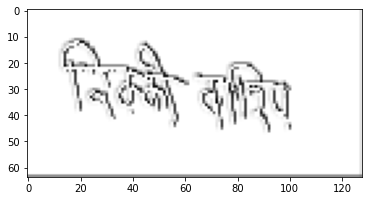

In [21]:
imgl=xltest[0].reshape(64,128)
plt.imshow(imgl, cmap ="gray")
plt.show()

## Training model for hog

In [10]:
modelhog=SVC(C=0.1,kernel='poly',gamma=1)
modelhog.fit(xhtrain,yhtrain)

SVC(C=0.1, gamma='auto', kernel='poly')

In [11]:
predictionhog=modelhog.predict(xhtest)
accuracyhog=modelhog.score(xhtest,yhtest)

categories=['Bengali','Hindi']

print('Accuracy: ',accuracyhog)
print('Prediction is :',categories[predictionhog[0]])
print(classification_report(yhtest, predictionhog))

Accuracy:  0.7272079772079773
Prediction is : Hindi
              precision    recall  f1-score   support

           0       0.64      0.67      0.66      1628
           1       0.79      0.76      0.77      2584

    accuracy                           0.73      4212
   macro avg       0.71      0.72      0.71      4212
weighted avg       0.73      0.73      0.73      4212

